<a href="https://colab.research.google.com/github/Swapnadeepgit/Timeseries_ML/blob/main/timeseries_ARIMA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Autoregressive Integrated Moving Average (ARIMA) model uses time-series data and statistical analysis to interpret the data and make future predictions.**

In [2]:
#importing neccesary libraries for ARIMA model
import pandas as pd
import numpy as np

In [4]:
#importing dataset
df=pd.read_csv('/content/MaunaLoaDailyTemps (1).csv',parse_dates=['DATE'],index_col='DATE')
df.head()
df=df.dropna()
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


<Axes: >

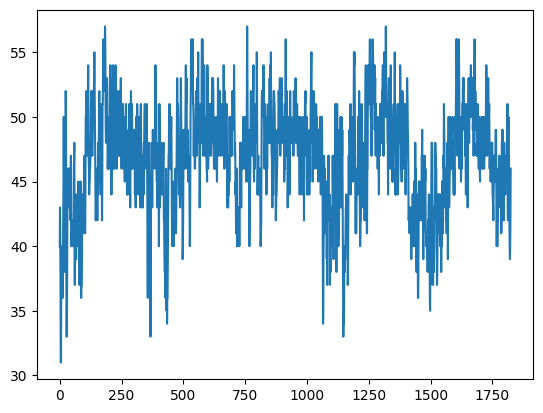

In [ ]:
#plotig the data
df['AvgTemp'].plot()

In [6]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

In [7]:
ad_test(df['AvgTemp'])

1. ADF :  -6.554680125068777
2. P-Value :  8.675937480199653e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [13]:
#Finding out the order of the ARIMA model
!pip install pmdarima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,
suppress_warnings=True)
print(stepwise_fit.summary())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.2 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.735, Time=5.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.60 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=3.09 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.311, Time=7.31 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.337, Time=4.28 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=4.26 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.577, Time=7.68 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.293, Time=5.15 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.620, Time=8.61 sec
 ARIMA(2,0,4)(0,0,0)

In [30]:
#splitting the data into test and train
from statsmodels.tsa.arima.model import ARIMA
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape)
print(test.shape)
print(df.shape)

(1791, 5)
(30, 5)
(1821, 5)


In [49]:

#model traing
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore") #Fixed: Removed the extra indent

stepwise_fit = auto_arima(train['AvgTemp'],
                            seasonal=False, # Start with non-seasonal ARIMA
                            trace=True,
                            suppress_warnings=True,
                            start_p=0, start_q=0, # Wider search range
                            max_p=5, max_q=5, max_d=2)

print(stepwise_fit.summary())

# Use the best order found by auto_arima
best_order = stepwise_fit.order
model = ARIMA(train['AvgTemp'], order=best_order)
model = model.fit()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18878.379, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=16522.596, Time=0.60 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=8401.879, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=4.79 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=8339.923, Time=0.52 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=14646.166, Time=1.95 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=8404.109, Time=0.72 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=8223.486, Time=0.42 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=13292.459, Time=2.67 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=8173.235, Time=3.75 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=2.80 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=8165.921, Time=0.91 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=8174.703, Time=0.57 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=in

In [55]:
#making predicting using the model
start = len(train)
end = len(train) + len(test) -1 # Corrected: end should align with the test set length

pred = model.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')

# Convert the index of pred to DatetimeIndex
pred.index = df.index[start : end + 1]
print(pred)

DATE
2018-12-01    44.781236
2018-12-02    44.999758
2018-12-03    45.363084
2018-12-04    45.636742
2018-12-05    45.750669
2018-12-06    45.801285
2018-12-07    45.826766
2018-12-08    45.842228
2018-12-09    45.853656
2018-12-10    45.863421
2018-12-11    45.872462
2018-12-12    45.881152
Name: ARIMA Predictions, dtype: float64


<Axes: xlabel='DATE'>

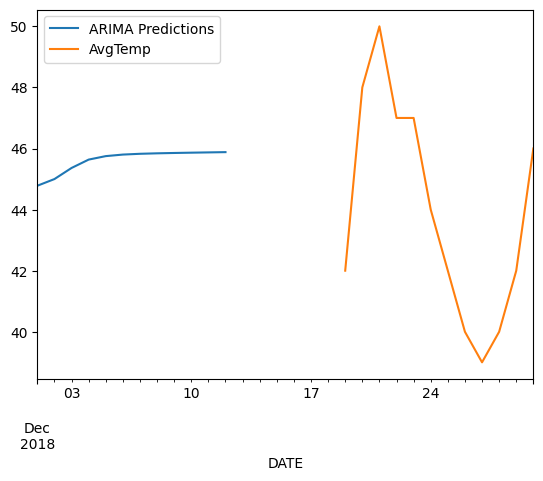

In [57]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [60]:
#checking for error
mean=test['AvgTemp'].mean()
print(mean)
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['AvgTemp']))
print(rmse)

43.916666666666664
3.979528988734046


In [61]:
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [64]:
#future predictions using the model
index_future_dates = pd.date_range(start='2018-12-01', end='2018-12-31')
future_dates = pd.DataFrame(index=index_future_dates, columns=df.columns)
future_df = pd.concat([df, future_dates])
print(future_df)

            MinTemp  MaxTemp  AvgTemp Sunrise Sunset
2014-01-01     33.0     46.0     40.0     657   1756
2014-01-02     35.0     50.0     43.0     657   1756
2014-01-03     36.0     45.0     41.0     657   1757
2014-01-04     32.0     41.0     37.0     658   1757
2014-01-05     24.0     38.0     31.0     658   1758
...             ...      ...      ...     ...    ...
2018-12-27      NaN      NaN      NaN     NaN    NaN
2018-12-28      NaN      NaN      NaN     NaN    NaN
2018-12-29      NaN      NaN      NaN     NaN    NaN
2018-12-30      NaN      NaN      NaN     NaN    NaN
2018-12-31      NaN      NaN      NaN     NaN    NaN

[1852 rows x 5 columns]


<Axes: >

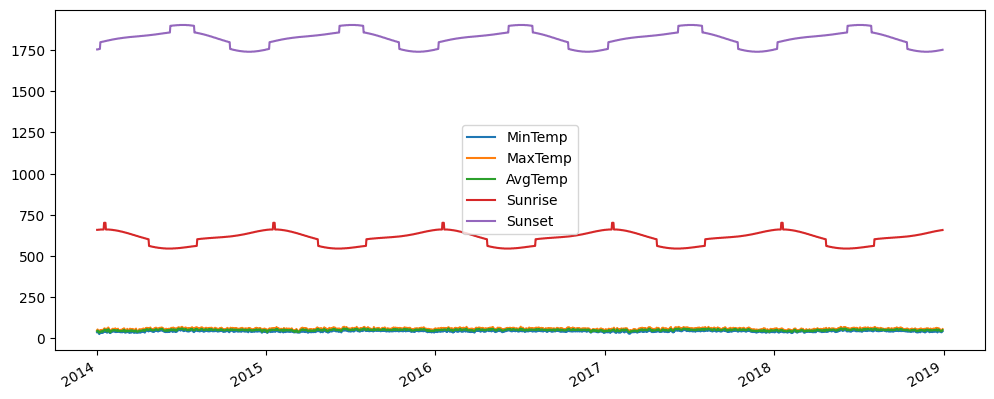

In [66]:
future_df.plot(figsize=(12,5),legend=True)